# **Importing Libraries**

In [182]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax


# **Loading data**

In [183]:
data = pd.read_csv("data_for_lr.csv")

In [184]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [186]:
data.isnull().sum()

x    0
y    1
dtype: int64

# **Data Processing**

## handling null values

In [187]:
data = data.dropna()
print("shape of the data : ",data.shape)

shape of the data :  (699, 2)


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# **Splitting data**

In [189]:
# training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# valid data and lebels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


# <font color = "red">**Linear Regression**</font>

## **Forward Propogation**

f(x) = m*x + c

where m and c are the parameters that or model will learn through training.

In [190]:
def forward_propagation(train_input, parameter):
  m = parameter["m"]
  c = parameter["c"]

  predictions = np.multiply(m , train_input) + c

  return predictions

## **Defining Cost Function**

**Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5**

where y are the actual or true values and f(x) are the predicted values.

In [191]:
def cost_function(predictions,train_output):

  cost = np.mean((train_output - predictions) ** 2) * 0.5

  return cost

## **Gradient Descent for Backpropagation**

Using Chain Rule:

cost
f = f(x)
Partial Derivative of cost function w.r.t m *dcost/dm = dcost/df * df/dm *

Partial Derivative of cost function w.r.t c *dcost/dc = dcost/df * df/dc *

Partial Derivatives:

df = (f(x)-y)/n

dm = df * x

dc = df * 1



In [192]:
def backward_propagation(train_input, train_output, predictions):

  derivatives = dict()

  df = (predictions - train_output)
  dm = np.mean(np.multiply(df , train_input))
  dc = np.mean(df)

  derivatives["dm"] = dm
  derivatives["dc"] = dc

  return derivatives

## **Update the Parameters**

m = m - (learning_rate * dm)

c = c - (learning_rate * dc)

In [193]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## **Train the training**

Sequence of Steps:

- Forward Propagtaion
- Cost Function
- Backward Propagation
- Update Parameters

In [194]:
def train(train_input, train_output, learning_rate, iters):

  # random parameter
  parameters = dict()
  parameters["m"] = np.random.uniform(0,1)
  parameters["c"] = np.random.uniform(0,1)

  plt.figure()

  # loss
  loss = list()

  # iterations

  for i in range(iters):

    # forward propagation
    predictions = forward_propagation(train_input, parameters)

    # cost
    cost = cost_function(predictions, train_output)

    loss.append(cost)
    print(f"iteration = {i+1}, loss = {cost}")
    
    #plot
    fig, ax = plt.subplots()

    ax.plot(train_input, train_output, '+', label = "original")
    ax.plot(train_input, predictions, '*', label = "Training")

    legend = ax.legend()

    plt.plot(train_input, train_output, '+', label = "original")
    plt.plot(train_input, predictions, '*', label = "Training")
    plt.show()

     # backward propagation
    derivatives = backward_propagation(train_input, train_output, predictions)

    # update parametrs
    parameters = update_parameters(parameters, derivatives, learning_rate)

  
  return parameters, loss



## **Training**

iteration = 1, loss = 430.8873238579254


<Figure size 432x288 with 0 Axes>

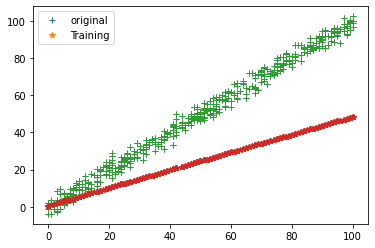

iteration = 2, loss = 197.6728310723324


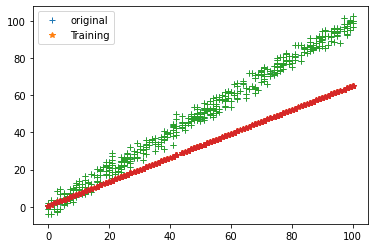

iteration = 3, loss = 91.8631552341671


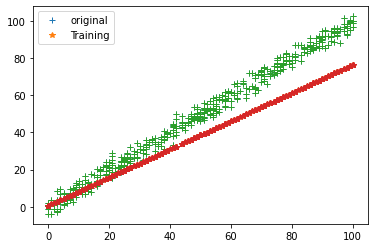

iteration = 4, loss = 43.85718596398402


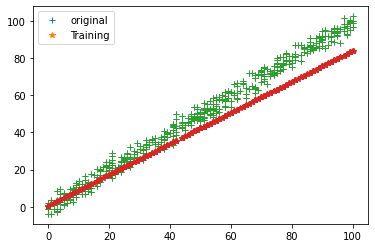

iteration = 5, loss = 22.076822389570072


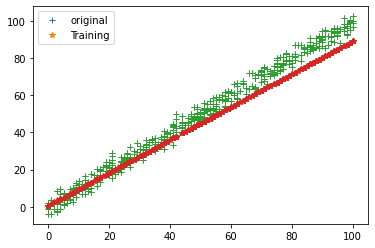

iteration = 6, loss = 12.195045167996359


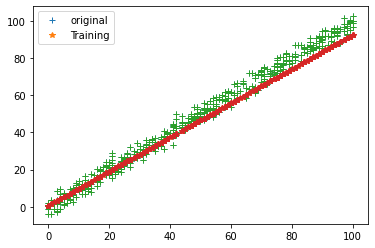

iteration = 7, loss = 7.711669754178797


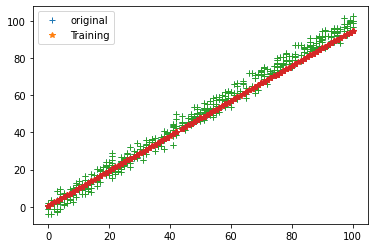

iteration = 8, loss = 5.677555220140502


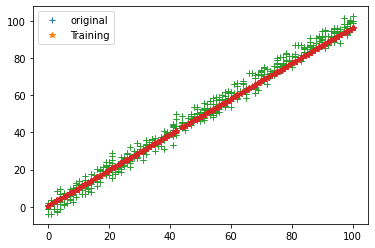

iteration = 9, loss = 4.754673060268282


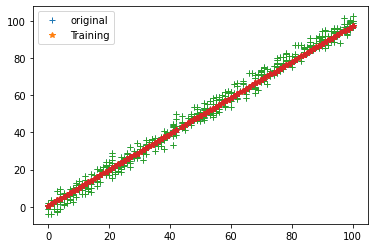

iteration = 10, loss = 4.335958259509931


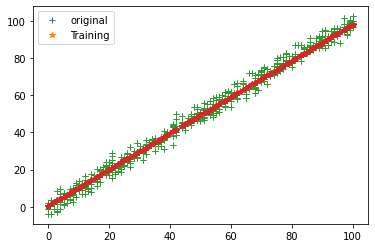

iteration = 11, loss = 4.145984748126018


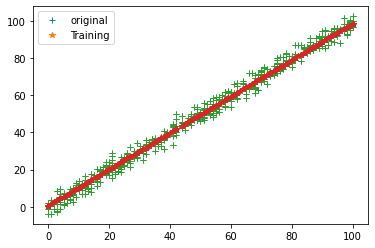

iteration = 12, loss = 4.05979141320249


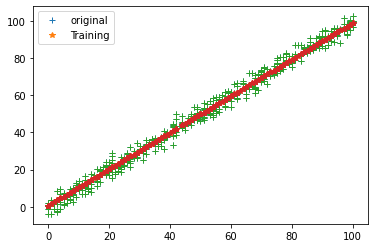

iteration = 13, loss = 4.020683259398153


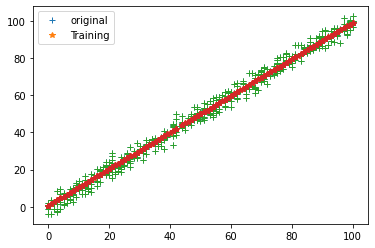

iteration = 14, loss = 4.002937704529


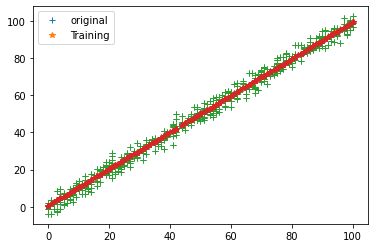

iteration = 15, loss = 3.9948843845667406


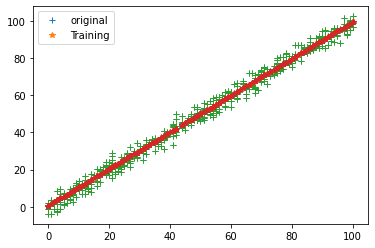

iteration = 16, loss = 3.991228442425162


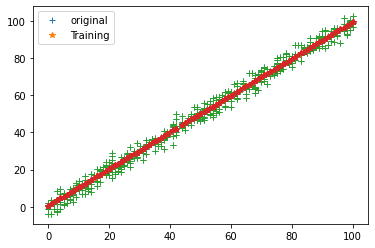

iteration = 17, loss = 3.9895675955794396


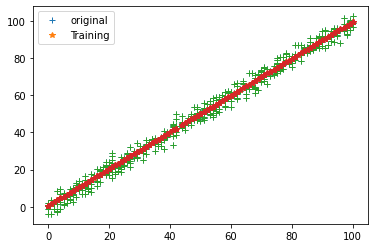

iteration = 18, loss = 3.9888119257871884


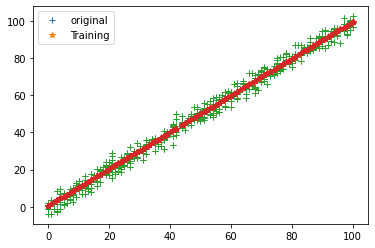

iteration = 19, loss = 3.988466935934595


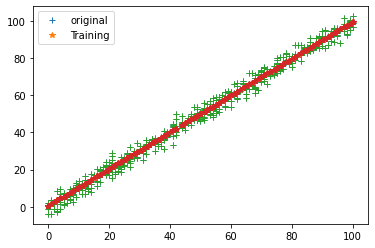

iteration = 20, loss = 3.9883082721333927


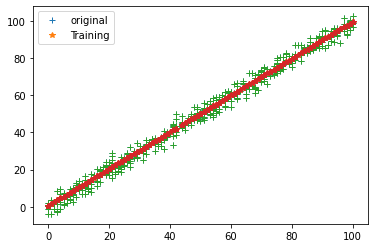

In [195]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [196]:
#parameters, loss = train(train_input, train_output, 0.01, 20)   ## learning rate is so high jumping
                                                                # up left right not goes to optimum

In [197]:
print(parameters)

{'m': 0.9889096037970034, 'c': 0.549940465922013}


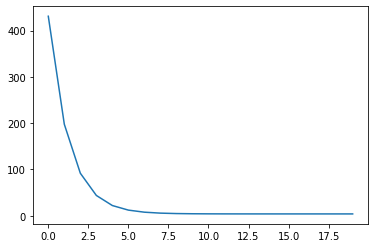

In [198]:
plt.plot(loss)

## **predicting**

In [199]:
test_predictions = test_input * parameters['m'] + parameters['c']


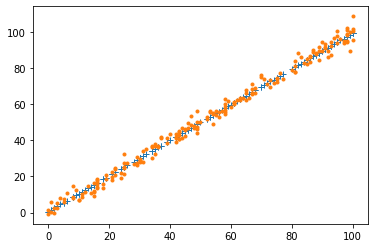

In [201]:
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input,test_output, ".")
plt.show()

In [202]:
cost_function(test_output,test_predictions)

4.008713100240702

it means our predictions are +- 4.0087   error range 